# Projeto 5

### Bruno Gomes

### Introdução
O principal objetivo do projeto 5 era, por meio do uso de modelos de regressão linear múltipla, analisar se existe uma relação entre uma variável resposta e duas explicativas, respondendo uma pergunta formulada pela equipe que envolva as variáveis escolhidas. A pergunta que responderei com esse projeto é:
#### Como o PIB per capita e o acesso a saneamento básico influenciam a mortalidade infantil?

#### Variável Resposta:
Como variável resposta foi escolhida a Mortalidade Infantil (entre 1000 crianças nascidas e com menos de 5 anos) em cada país. É extremamente importante analisar essa variável, pois este é um problema que afeta o mundo inteiro, principalmente os países mais pobres e para diminuí-la, antes é preciso entender suas causas.
#### Variáveis explicaivas:
<ul>
<li>PIB per capita</li>
<li>Acesso a Saneamento Básico</li>
</ul>

In [1]:
%matplotlib notebook

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 # Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  # Usa OLS como no R

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [3]:
dados = pd.read_excel("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\Projeto5_DPA\\Dados\\Final.xlsx", index_col = 0)

In [4]:
df = pd.DataFrame

In [5]:
mor = dados.Mortality
san = dados.Sanitation
gdp = dados.GDP
mln = dados.Mortality_ln
gln = dados.GDP_ln

In [6]:
Sanitation = pd.DataFrame(dados.Sanitation)
GDP = pd.DataFrame(dados.GDP)
Mortality = pd.DataFrame(dados.Mortality)
Mortality_ln = pd.DataFrame(dados.Mortality_ln)
GDP_ln = pd.DataFrame(dados.GDP_ln)

In [7]:
dados.head()

,Sanitation,GDP,Mortality,GDP_ln,Mortality_ln
Country,,,,,
Afghanistan,37,1298,113.2,7.168580,4.729156
Albania,91,7977,18.7,8.984318,2.928524
Algeria,94,12289,30.7,9.416460,3.424263
Angola,54,6453,196.4,8.772300,5.280153
Argentina,90,13873,15.8,9.537700,2.760010


### Análise Descritiva

In [8]:
dados.describe()

,Sanitation,GDP,Mortality,GDP_ln,Mortality_ln
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,71.000000,16079.036810,45.086503,8.994844,3.221676
std,30.439578,19877.099022,45.427905,1.258454,1.166397
min,9.000000,555.000000,2.800000,6.318968,1.029619
25%,48.000000,2873.500000,9.250000,7.963240,2.224492
50%,83.000000,8820.000000,22.800000,9.084777,3.126761
75%,98.000000,21400.000000,72.800000,9.971145,4.287556
max,100.000000,126364.000000,196.400000,11.746922,5.280153


In [9]:
dados.corr(method = 'pearson')

,Sanitation,GDP,Mortality,GDP_ln,Mortality_ln
Sanitation,1.000000,0.562346,-0.850355,0.811576,-0.845027
GDP,0.562346,1.000000,-0.529589,0.813896,-0.697753
Mortality,-0.850355,-0.529589,1.000000,-0.798756,0.897760
GDP_ln,0.811576,0.813896,-0.798756,1.000000,-0.879864
Mortality_ln,-0.845027,-0.697753,0.897760,-0.879864,1.000000


### Análise Gráfica

<IPython.core.display.Javascript object>


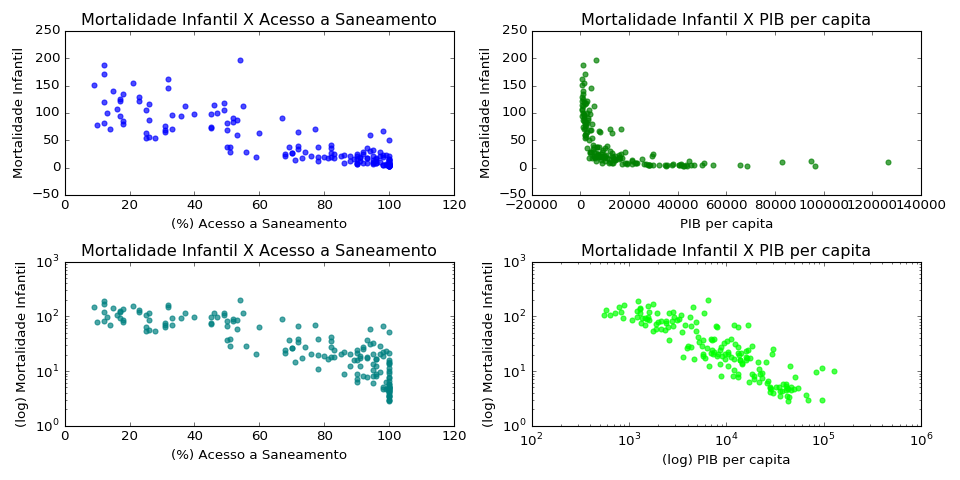

In [10]:
f, axs = plt.subplots(2, 2, figsize = (12, 6))
axs = axs.ravel()

axs[0].scatter(san, mor, alpha = 0.7, color = 'Blue')
axs[0].set_title("Mortalidade Infantil X Acesso a Saneamento")
axs[0].set_xlabel('(%) Acesso a Saneamento')
axs[0].set_ylabel('Mortalidade Infantil')

axs[1].scatter(gdp, mor, alpha = 0.7, color = 'Green')
axs[1].set_title('Mortalidade Infantil X PIB per capita')
axs[1].set_xlabel('PIB per capita')
axs[1].set_ylabel('Mortalidade Infantil')

axs[2].scatter(san, mor, alpha = 0.7, color = 'Teal')
axs[2].set_title('Mortalidade Infantil X Acesso a Saneamento')
axs[2].set_xlabel('(%) Acesso a Saneamento')
axs[2].set_ylabel('(log) Mortalidade Infantil')
axs[2].set_yscale('log')

axs[3].scatter(gdp, mor, alpha = 0.7, color = 'Lime')
axs[3].set_title('Mortalidade Infantil X PIB per capita')
axs[3].set_xlabel('(log) PIB per capita')
axs[3].set_ylabel('(log) Mortalidade Infantil')
axs[3].set_yscale('log')
axs[3].set_xscale('log')

plt.tight_layout(1)

Após analisar os gráficos optei por usar o log da mortalidade como variável resposta, já como variável explicativa usei o acesso a saneamento e o log do PIB per capita, pois estas aparentam apresentar uma maior correlação entre si do que os outros conjuntos. 

<IPython.core.display.Javascript object>


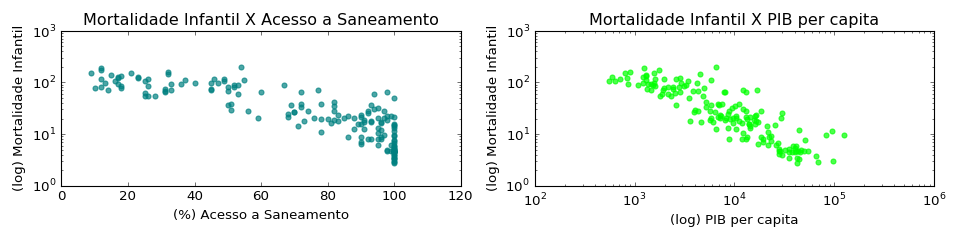

In [11]:
f, axs = plt.subplots(1, 2, figsize = (12, 3))
axs = axs.ravel()

x, t, c, l = [[san, gdp], ['Mortalidade Infantil X Acesso a Saneamento', 'Mortalidade Infantil X PIB per capita'], 
              ['Teal', 'Lime'], ['(%) Acesso a Saneamento', '(log) PIB per capita']]

for i in range(0, 2):
    axs[i].scatter(x[i], mor, alpha = 0.7, color = c[i])
    axs[i].set_title(t[i])
    axs[i].set_xlabel(l[i])
    axs[i].set_ylabel('(log) Mortalidade Infantil')
    axs[i].set_yscale('log')
    if i == 1:
        axs[i].set_xscale('log')

plt.tight_layout(1)

Obtemos assim um modelo de Regressão Linear Múltipla Log-Lin-Log dado por: $ln(Mortalidade Infantil) = \beta o + \beta1Acesso Saneamento + \beta2ln(PIB per Capita) + \varepsilon$

### Ajustando um Modelo de Regressão Múltipla

In [12]:
model = sm.ols(formula = 'Mortality_ln ~ Sanitation + GDP_ln', data = dados)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Mortality_ln   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     375.6
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           3.65e-61
Time:                        21:19:51   Log-Likelihood:                -114.10
No. Observations:                 163   AIC:                             234.2
Df Residuals:                     160   BIC:                             243.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.0050      0.361     24.939      0.000         8.292     9.718
Sanitation    -0.0147      0.002     -6.766      0.000        -0.019    -0.010
GDP_ln        -0.5269      0.053    -10.026      0.000        -0.631    -0.423
==============================================================================
Omnibus:                       13.580   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.535
Skew:                           0.714   Prob(JB):                     0.000698
Kurtosis:                       3.320   Cond. No.                         735.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos observar que o valor-p é igual a 0 para todos os diferentes parametros e que $\beta o = 9.0050$, $\beta 1 = -0.0147$ e $\beta 2 = -0.5269$. Como a hipótese inicial era de que $\beta0 = \beta1 = \beta2 = 0$, podemos afirmar que os parâmetros obtidos são relevantes ao modelo adotado.

Vale falar que o valor do coeficiente $\beta0$ não tem muita importância para a análise, a razão disso será explicada na interpretação dos parâmetros utilizando as estimativas.

### Adequação das suposições do modelo e qualidade do ajuste
Podemos visualizar a adequação das suposições do modelo no gráfico feito abaixo. Quanto a qualidade, conseguimos observar que o valor do Coeficiente de Determinação obtido acima é de 82,4%, o que significa que o modelo está bem próximo dos valores reais.

<IPython.core.display.Javascript object>


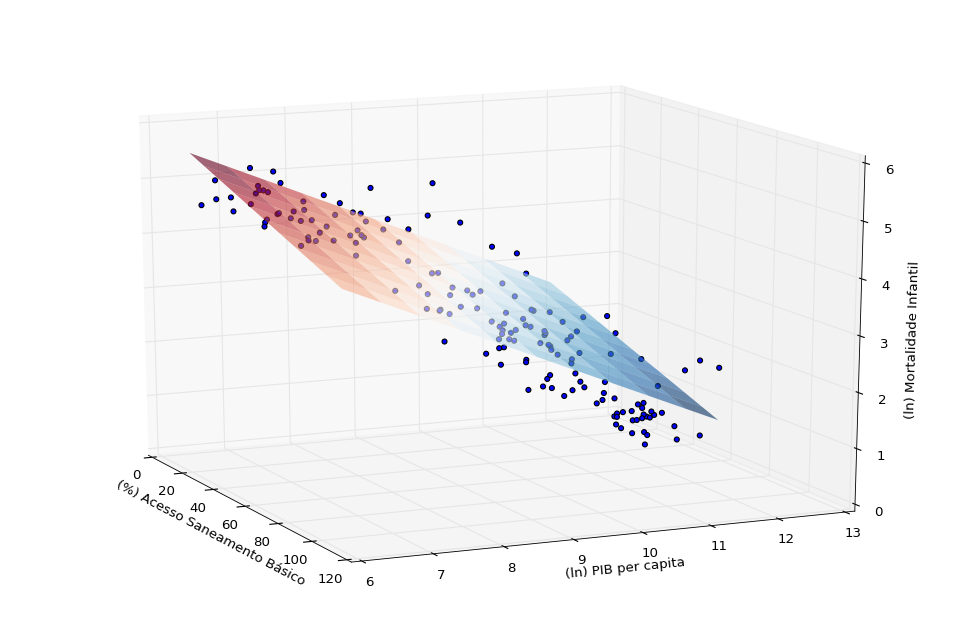

In [13]:
X = dados[['Sanitation', 'GDP_ln']]
y = dados['Mortality_ln']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Sanitation.min(), X.Sanitation.max(), 100),  
                       np.linspace(X.GDP_ln.min(), X.GDP_ln.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize = (12, 8))
ax = Axes3D(fig, azim = -115, elev = 15)

surf = ax.plot_surface(xx1, xx2, Z, cmap = plt.cm.RdBu_r, alpha = 0.6, linewidth = 0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Sanitation, X[resid >= 0].GDP_ln, y[resid >= 0], color = 'black', alpha = 1, facecolor = 'white')
ax.scatter(X[resid < 0].Sanitation, X[resid < 0].GDP_ln, y[resid < 0], color = 'black', alpha = 1)

ax.set_xlabel('(%) Acesso Saneamento Básico')
ax.set_ylabel('(ln) PIB per capita')
ax.set_zlabel('(ln) Mortalidade Infantil')

plt.show()

### Interpretação dos parâmetros utilizando as estimativas
#### Valor estimado de $\beta o$:
Não é importante a análise do valor estimado de $\beta o$ (intercepto), pois esse é o valor previsto para a variável resposta (mortalidade infantil) quando as variáveis explicativas (acesso a saneamento e PIB per capita) forem zero, e no mundo real não faz sentido essas variáveis zerarem.
#### Valor estimado de $\beta 1$:
#### Como temos um modelo Log-Lin com as variáveis em questão, precisamos multiplicar o valor de $\beta 1$ por 100 para chegar na interpretação correta.
Com a estimativa de $\beta 1$ podemos dizer que a cada 1% a mais da população que tem acesso a saneamento básico em um país, a mortalidade infantil (dentre 1000 crianças nascidas e com menos de 5 anos) diminui cerca de 1,47%.
#### Valor estimado de $\beta 2$:
#### Como temos um modelo Log-Log com as variáveis em questão, não precisamos multiplicar o valor de $\beta 2$ por nada para chegar na interpretação correta.
Com a estimativa de $\beta 2$ podemos dizer que a cada 1 dólar internacional a mais no PIB per capita de um país, a mortalidade infantil (dentre 1000 crianças nascidas e com menos de 5 anos) diminui cerca de 0,5269%.

### Conclusão
A análise dos coeficientes que foram estimados pela regressão indicam que o PIB per capita e a porcentagem da população com acesso a saneamento básico influenciam a taxa de mortalidade infantil de crianças nascidas e com menos de cinco anos, onde quanto maior o PIB e o acesso a saneamento menor é a taxa de mortalidade do país. Essa conclusão também pode ser observada visualmente nos gráficos feitos, ao comparar os rankings dos países com maior taxa de mortalidade infantil, acesso a saneamento e PIB per capita e em estudos realizados, como por exemplo: INFLUENCIA DE FATORES SOCIAIS E AMBIENTAIS NA MORTALIDADE INFANTIL (https://repositorio.ufba.br/ri/bitstream/ri/6158/1/Paim%20JS.%20artigo%201.%201980.pdf, acesso em 30 de maio de 2017) que mesmo sendo um estudo feito no Nodeste do Brasil, mostra a influência do PIB na mortalidade infantil.